# Praca domowa tydzień 4 - część techniczna

W pracy domowej będziesz pracować na 3 plikach, które znajdziesz w repo w folderze `data/housing/*`:

1. `housing_train.csv` - plik z danymi do treningu
2. `housing_validation.csv` - plik na którym dokonasz predykcji
3. `housing_example_submission.csv` - która będzie miała taki format

Praca danymi podzielona jest na dwie części.

## Wytrenuj określony model regresji liniowej

W pierwszej części musisz dokładnie podążać za poniższym przepisem.

Dokonaj następującego preprocessingu pracując na całym `housing_train.csv`:

1. Kolumny które mają powyżej 70% NA zamień po prostu na kolumnę `NA_in_col_*` zgodnie z tym jak pokazałem w prezentacji, **usuwając jednocześnie oryginalną kolumnę** (w prezentacji oryginalna kolumna zostawała).
2. Resztę kolumn z brakami uzupełnij **medianą** z danej kolumny.

Na takiej ramce danych wytrenuj model regresji liniowej który będzie przewidywać kolumnę `MEDV`.
**Korzystając z tego modelu odpowiedz na pytania w formularzu google.**

Obserwacja dla jakiej należy podać predykcję poniżej.

## Wytrenuj najlepszy model jaki zdołasz

Teraz stajesz przed prawdziwym zadaniem MLowym.
Korzystając ze zdobytej wiedzy i (wspaniale napisanej) [dokumentacji scikit-learna](https://scikit-learn.org/stable/) zmierzysz się w konkursie MLowym!

Korzystając ze zbioru `housing_train.csv` wytrenuj najlepszy model jaki zdołasz zgodnie z metryką **Mean Square Error**, a następnie dokonaj predykcji na `housing_validation.csv`.
Predykcję zapisz do pliku tak aby miała format taki sam jak plik `housing_example_submission.csv` (to znaczy na przykład odpowiedni nagłówek, brak indeksu t.j. `s.to_csv(filename, index=False)`).
Oczywiście w pliku `housing_validation.csv` nie ma kolumny, `MEDV`, ją mam ja, a Ty masz przewidzieć.

Plik który otrzymasz zapisz na dysku i miej przygotowany na następne zajęcia, będzie trzeba go wgrać do aplikacji - sprawdzarki.

Za najlepsze rozwiązania przewidziane są następujące nagrody:

1. Miejsca 1-2 -> 5pkt dodatkowych punktów ponad limit z prac domowych
2. Miejsca 3-4 -> 4pkt dodatkowych punktów ponad limit z prac domowych
3. Miejsca 5-6 -> 3pkt dodatkowych punktów ponad limit z prac domowych
4. Miejsca 7-8 -> 2pkt dodatkowych punktów ponad limit z prac domowych
5. Miejsca 9-10 -> 1pkt dodatkowy punkt ponad limit z prac domowych

**Niezależnie od powyższych, dodatkowych nagród, 2 pkt w pracy domowej zostanie przyznany za wgranie swoich predykcji (choćby na podstawie wytrenowanego w części pierwszej modelu liniowego) do sprawdzarki konkursowej.**

### Podpowiedzi

Gdy będziesz uzupełniać braki medianą, popatrz jak robiłem to w notebooku wykładowym.

W części konkursowej możesz eksperymentować zarówno z innym preprocessingiem jak i z innymi modelami.

Pamiętaj, że trenowanie na `housing_train.csv` i sprawdzanie na tym samym zbiorze danych performance'u modelu może być bardzo złudne!
Prawdopodobnie zechcesz podzielić dataset `housing_train.csv` na train i test (niezależnie od `housing_validation.csv`).
Na tych dwóch zbiorach danych wybrać najlepszy model i dopiero wtedy dokonać predykcji na `housing_validation.csv`.
Może czujesz, że warto poznać czym jest [kross-walidacja](https://scikit-learn.org/stable/modules/cross_validation.html)?

Oprócz modeli z biblioteki `sklearn` możesz również spróbować [xgboost](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn) oraz [lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html), powinny zadziałać bez problemu jako drop-in replacement.

### Kontekst

Na stronach takich jak [kaggle](https://www.kaggle.com/) możesz zmierzyć się w umiejętnościach MLowych.
Z reguły tam praca wygląda dokładnie tak samo, trenujesz model na jednych danych i dokonujesz predykcji na innych.

## Informacje dodatkowe na temat data strenuous

Jest to zmodyfikowany dataset Boston housing, klasyczny do nauki MLa.

Informacje na temat kolumn (nie do końca prawdziwe po moich edycjach ;) ):

```
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
        river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
```



# Rozwiązanie - pierwsze

In [45]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
df_train = pd.read_csv("./../data/housing/housing_train.csv")
df_test = pd.read_csv("./../data/housing/housing_validation.csv")
df_test.drop(columns=['PTRATIO'], inplace=True)

In [23]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.13960,0.0,8.56,0.0,NaN,6.167,90.0,2.4210,5,384.0,NaN,392.69,NaN,86.066034
1,0.03510,95.0,2.68,0.0,NaN,7.853,33.2,5.1180,4,224.0,NaN,392.78,NaN,207.700057
2,15.87440,0.0,18.10,0.0,NaN,6.545,99.1,1.5192,24,666.0,NaN,396.90,21.08,46.689349
3,0.18337,0.0,27.74,0.0,NaN,5.414,98.3,1.7554,4,711.0,NaN,344.05,23.97,29.980669
4,0.12816,12.5,6.07,0.0,NaN,5.885,33.0,6.4980,4,345.0,NaN,396.90,NaN,89.461275


In [24]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,430.000000,430.000000,430.000000,408.000000,52.000000,430.000000,430.000000,430.000000,430.000000,420.000000,420.000000,430.000000,88.000000,430.000000
mean,3.694840,11.370930,11.157209,0.073529,0.772442,6.298342,68.916744,3.772554,9.504651,410.959524,18.371429,354.476256,23.902386,97.222903
std,8.789114,23.197997,6.934849,0.261324,0.065919,0.717532,28.019891,2.131754,8.680752,168.251675,2.214768,93.897035,4.756535,40.155983
min,0.009060,0.000000,0.740000,0.000000,0.713000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,17.930000,21.445934
25%,0.081900,0.000000,5.130000,0.000000,0.713000,5.888250,45.450000,2.063900,4.000000,283.250000,16.900000,374.597500,19.910000,72.899822
50%,0.274475,0.000000,9.125000,0.000000,0.740000,6.210000,78.200000,3.107300,5.000000,332.000000,18.800000,391.305000,23.255000,91.648354
75%,3.560263,12.500000,18.100000,0.000000,0.871000,6.630750,93.975000,5.269125,24.000000,666.000000,20.200000,395.935000,26.930000,108.098012
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,214.412960


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     430 non-null    float64
 1   ZN       430 non-null    float64
 2   INDUS    430 non-null    float64
 3   CHAS     408 non-null    float64
 4   NOX      52 non-null     float64
 5   RM       430 non-null    float64
 6   AGE      430 non-null    float64
 7   DIS      430 non-null    float64
 8   RAD      430 non-null    int64  
 9   TAX      420 non-null    float64
 10  PTRATIO  420 non-null    float64
 11  B        430 non-null    float64
 12  LSTAT    88 non-null     float64
 13  MEDV     430 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 47.2 KB


+ Zamienienie kolumn, których NULL_RATIO > 70%

In [26]:
print("TRAIN:")
for col in df_train.columns:
  print("\t{} | {:.1f}%".format(col, (df_train[col].isna().sum()/df_train[col].shape[0])*100))
print("TEST:")
for col in df_test.columns:
  print("\t{} | {:.1f}%".format(col, (df_test[col].isna().sum()/df_test[col].shape[0])*100))

TRAIN:
	CRIM | 0.0%
	ZN | 0.0%
	INDUS | 0.0%
	CHAS | 5.1%
	NOX | 87.9%
	RM | 0.0%
	AGE | 0.0%
	DIS | 0.0%
	RAD | 0.0%
	TAX | 2.3%
	PTRATIO | 2.3%
	B | 0.0%
	LSTAT | 79.5%
	MEDV | 0.0%
TEST:
	CRIM | 0.0%
	ZN | 0.0%
	INDUS | 0.0%
	CHAS | 3.9%
	NOX | 88.2%
	RM | 0.0%
	AGE | 0.0%
	DIS | 0.0%
	RAD | 0.0%
	TAX | 0.0%
	B | 0.0%
	LSTAT | 75.0%


In [28]:
df_train['NA_in_col_NOX'] = df_train['NOX'].isna().apply(lambda x: 1 if x==True else 0)
df_train.drop(columns=['NOX'], inplace=True)
df_train['NA_in_col_LSTAT'] = df_train['LSTAT'].isna().apply(lambda x: 1 if x==True else 0)
df_train.drop(columns=['LSTAT'], inplace=True)

In [42]:
df_y = df_train['MEDV']
df_x = df_train.drop(columns=["MEDV"])

In [43]:
median_imputer = SimpleImputer(missing_values=pd.NA, strategy="median")
X = median_imputer.fit_transform(df_x)

In [39]:
df_not_na = pd.DataFrame(X, columns=df_train.columns)

In [46]:
model = LinearRegression()
model.fit(X, df_y.to_numpy())
y_pred = model.predict(X)

print("Model on one variable")
print(f"Model MSE: {mean_squared_error(df_y.to_numpy(), y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(df_y.to_numpy(), y_pred))}")
print(f"Model MAD: {mean_absolute_error(df_y.to_numpy(), y_pred)}")

Model on one variable
Model MSE: 499.1946381391015
Model RMSE: 22.342664078822416
Model MAD: 15.329853228913281


In [48]:
df_x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'NA_in_col_NOX', 'NA_in_col_LSTAT'],
      dtype='object')

In [47]:
model.coef_

array([-0.69300824,  0.2101418 , -0.15905733, 13.85183992, 25.28052686,
       -0.16047165, -5.30145659,  1.42144569, -0.05719222, -3.67961898,
        0.05511439, 20.61987047, 20.98939283])

In [49]:
s = pd.Series(model.coef_, df_x.columns)
s['Intercept'] = model.intercept_
s

CRIM               -0.693008
ZN                  0.210142
INDUS              -0.159057
CHAS               13.851840
RM                 25.280527
AGE                -0.160472
DIS                -5.301457
RAD                 1.421446
TAX                -0.057192
PTRATIO            -3.679619
B                   0.055114
NA_in_col_NOX      20.619870
NA_in_col_LSTAT    20.989393
Intercept          -6.796092
dtype: float64

obserwacje modyfikujemy :)

In [50]:
obs = pd.DataFrame({
    'CRIM': [3.69],
    'ZN': [11.37],
    'INDUS': [11.15],
    'CHAS': [0.07],
    'NOX': [0.87],
    'RM': [6.29],
    'AGE': [68.91],
    'DIS': [3.77],
    'RAD': [9.50],
    'TAX': [410.95],
    'PTRATIO': [18.37],
    'B': [354.47],
    'LSTAT': [0.79],
})
obs

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.69,11.37,11.15,0.07,0.87,6.29,68.91,3.77,9.5,410.95,18.37,354.47,0.79


In [51]:
obs = pd.DataFrame({
    'CRIM': [3.69],
    'ZN': [11.37],
    'INDUS': [11.15],
    'CHAS': [0.07],
    'RM': [6.29],
    'AGE': [68.91],
    'DIS': [3.77],
    'RAD': [9.50],
    'TAX': [410.95],
    'PTRATIO': [18.37],
    'B': [354.47],
    'NA_in_col_NOX': [0.0],
    'NA_in_col_LSTAT': [0.0],
})
obs

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,NA_in_col_NOX,NA_in_col_LSTAT
0,3.69,11.37,11.15,0.07,6.29,68.91,3.77,9.5,410.95,18.37,354.47,0.0,0.0


In [52]:
model.predict(obs.to_numpy())

array([62.14446917])

In [53]:
obs2 = pd.DataFrame({
    'CRIM': [3.69],
    'ZN': [11.37],
    'INDUS': [11.15],
    'CHAS': [0.07],
    'RM': [8.29],
    'AGE': [68.91],
    'DIS': [3.77],
    'RAD': [9.50],
    'TAX': [410.95],
    'PTRATIO': [18.37],
    'B': [354.47],
    'NA_in_col_NOX': [0.0],
    'NA_in_col_LSTAT': [0.0],
})
obs2

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,NA_in_col_NOX,NA_in_col_LSTAT
0,3.69,11.37,11.15,0.07,8.29,68.91,3.77,9.5,410.95,18.37,354.47,0.0,0.0


In [54]:
model.predict(obs2.to_numpy())

array([112.70552289])

# IV. Zadanie - konkurs
### 1. Importy, seedy

In [106]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

In [107]:
SEED = 42

### 2. Data preprocessing

In [108]:
df_train = pd.read_csv("./../data/housing/housing_train.csv")
df_test = pd.read_csv("./../data/housing/housing_validation.csv")

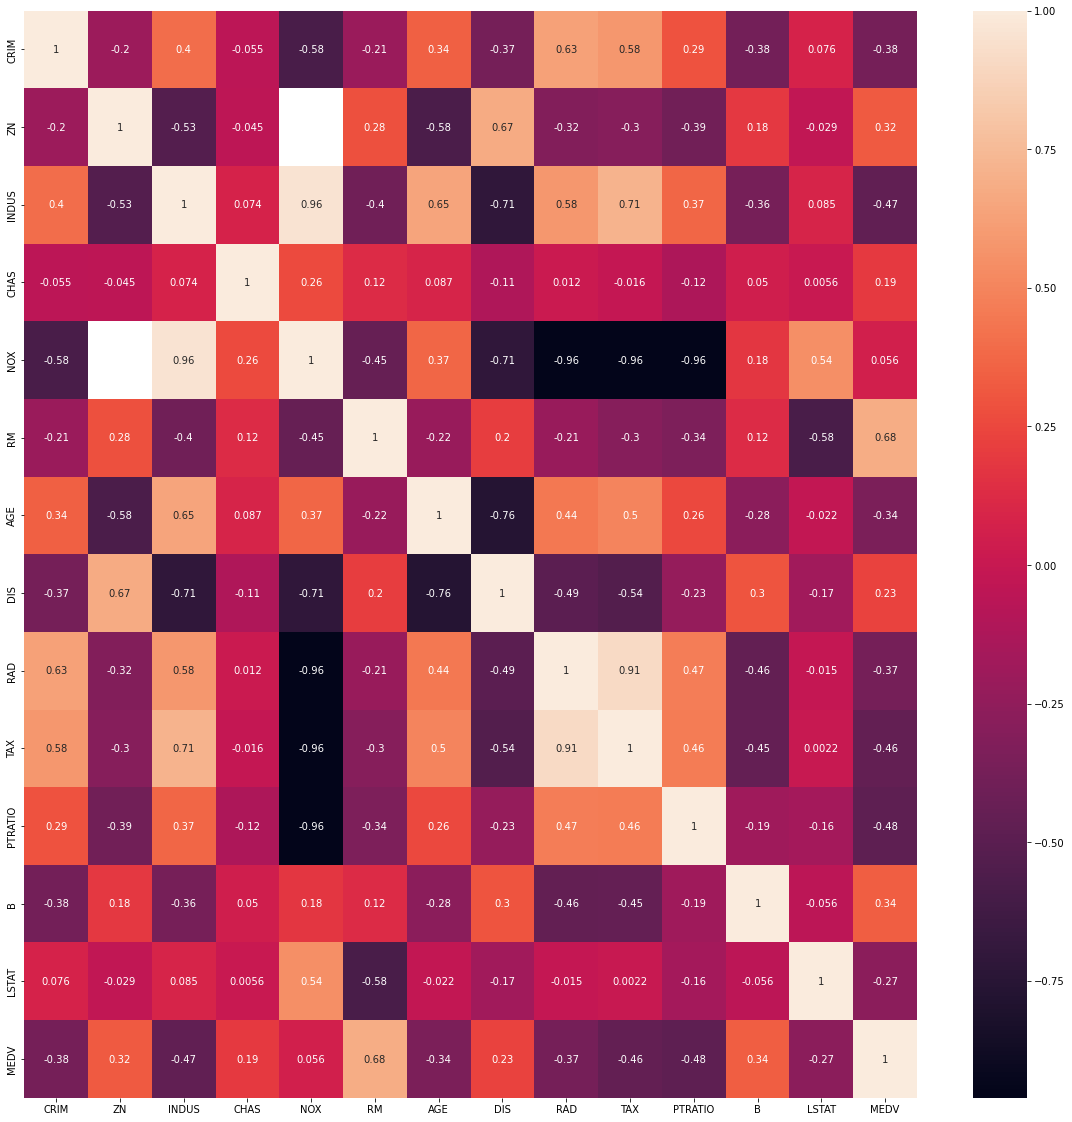

In [109]:
plt.figure(figsize=(20, 20))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [110]:
df_train.drop(columns=['PTRATIO', 'NOX'], inplace=True)
df_test.drop(columns=['PTRATIO', 'NOX'], inplace=True)

In [111]:
df_y_train = df_train['MEDV']
df_train.drop(columns=['MEDV'], inplace=True)

In [112]:
df_train['NA_in_LSTAT'] = df_train['LSTAT'].isna().apply(lambda x: 1 if x else 0)
df_test['NA_in_LSTAT'] = df_test['LSTAT'].isna().apply(lambda x: 1 if x else 0)
df_train.drop(columns=['LSTAT'], inplace=True)
df_test.drop(columns=['LSTAT'], inplace=True)

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         430 non-null    float64
 1   ZN           430 non-null    float64
 2   INDUS        430 non-null    float64
 3   CHAS         408 non-null    float64
 4   RM           430 non-null    float64
 5   AGE          430 non-null    float64
 6   DIS          430 non-null    float64
 7   RAD          430 non-null    int64  
 8   TAX          420 non-null    float64
 9   B            430 non-null    float64
 10  NA_in_LSTAT  430 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 37.1 KB


In [114]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         76 non-null     float64
 1   ZN           76 non-null     float64
 2   INDUS        76 non-null     float64
 3   CHAS         73 non-null     float64
 4   RM           76 non-null     float64
 5   AGE          76 non-null     float64
 6   DIS          76 non-null     float64
 7   RAD          76 non-null     int64  
 8   TAX          76 non-null     float64
 9   B            76 non-null     float64
 10  NA_in_LSTAT  76 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 6.7 KB


In [115]:
median_imputer = SimpleImputer(missing_values=pd.NA, strategy="median")

In [116]:
arr_train = median_imputer.fit_transform(df_train)
arr_test = median_imputer.transform(df_test)

In [117]:
df_train_new = pd.DataFrame(arr_train, columns=df_train.columns)
df_test_new = pd.DataFrame(arr_test, columns=df_test.columns)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'NA_in_LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

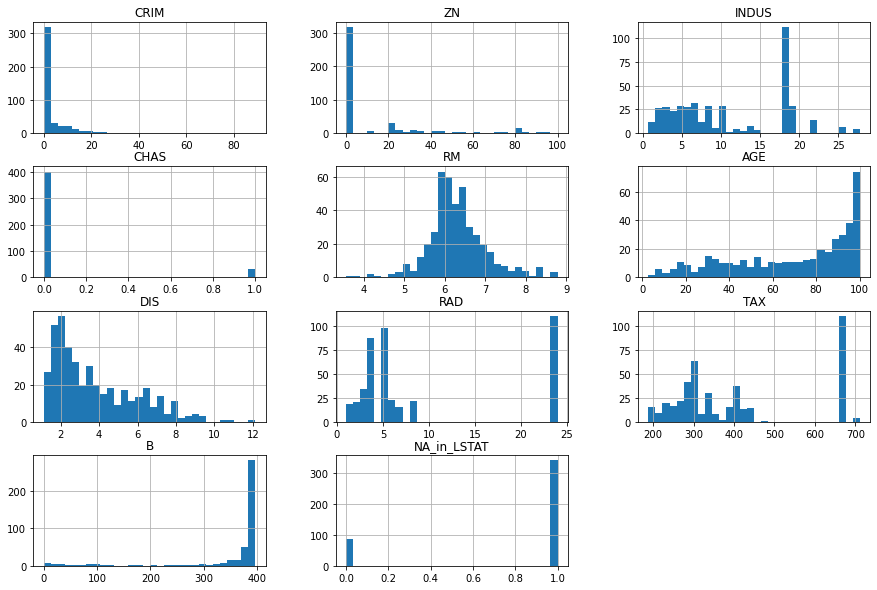

In [118]:
df_train_new.hist(bins=30, figsize=(15,10))

In [119]:
df_train_new.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B',
       'NA_in_LSTAT'],
      dtype='object')

In [120]:
df_train_rm = df_train_new['RM']
df_test_rm = df_test_new['RM']
df_train_new.drop(columns=['RM'], inplace=True)
df_test_new.drop(columns=['RM'], inplace=True)

In [121]:
scaler=MinMaxScaler(feature_range=(0,1))
train_X = scaler.fit_transform(df_train_new)
test_X = scaler.transform(df_test_new)

In [122]:
std_rm = df_train_rm.std()
mean_rm = df_train_rm.mean()
df_train_rm = (df_train_rm - mean_rm) / std_rm
df_test_rm = (df_test_rm - mean_rm) / std_rm

In [123]:
df_train = pd.DataFrame(train_X, columns=df_train_new.columns)
df_test = pd.DataFrame(test_X, columns=df_test_new.columns)
df_train['RM'] = df_train_rm
df_test['RM'] = df_test_rm

### 3. Modeling

In [136]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [141]:
X_train, y_train = df_train.to_numpy(), df_y_train.to_numpy()
print(X_train.shape)
print(y_train.shape)


(430, 11)
(430,)


In [142]:
seed = 5
folds = 10
metric = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}

# Linear algorithms
models['Linear'] = LinearRegression()
models['Lasso'] = Lasso()
models['ElasticNet'] = ElasticNet()
models['Ridge'] = Ridge()

# Nonlinear algorithms
models['KNN'] = KNeighborsRegressor()
models['SVR'] = SVR(gamma='auto')
models['DecisionTree'] = DecisionTreeRegressor()
models['BaggedDTree'] = BaggingRegressor(n_estimators=100, max_features=4)
models['RandomForest'] = RandomForestRegressor(n_estimators=100, max_features=4)
models['ExtraTrees'] = ExtraTreesRegressor(n_estimators=100, max_features=4)
models['AdaBoost'] = AdaBoostRegressor(n_estimators=100)
models['GradientBoost'] = GradientBoostingRegressor(n_estimators=100, max_features=4)
models['XGBoost'] = XGBRegressor(n_estimators=100)
models['LightGBM'] = LGBMRegressor(n_estimators=200)

In [143]:
# 10-fold cross validation for each model
model_results = []
model_names = []

for model_name in models:
    model = models[model_name]
    k_fold = KFold(n_splits=folds, shuffle=True, random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -613.809, 297.801
Lasso: -709.637, 384.17
ElasticNet: -825.061, 317.386
Ridge: -616.808, 315.221
KNN: -501.651, 300.238
SVR: -884.867, 268.889
DecisionTree: -636.423, 360.911
BaggedDTree: -496.971, 213.978
RandomForest: -302.199, 119.465
ExtraTrees: -291.16, 140.266
AdaBoost: -387.67, 153.503
GradientBoost: -294.648, 113.947
XGBoost: -300.545, 136.303
LightGBM: -380.484, 158.784


In [146]:
rf = RandomForestRegressor(random_state=seed)  


param_grid={
            'n_estimators': range(100, 500, 50),
            'max_features': range(2, 5, 1)   
            }

gsc = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_result = gsc.fit(X_train, y_train)

print("\nGridSearch result: Best MSE: %.3f using %s" % (grid_result.best_score_, grid_result.best_params_))

#create and fit the best regression model
best_model = RandomForestRegressor(**grid_result.best_params_)

best_model.fit(X_train, y_train)


GridSearch result: Best MSE: -325.416 using {'max_features': 3, 'n_estimators': 100}


RandomForestRegressor(max_features=3)

In [145]:
mod = GradientBoostingRegressor(random_state=seed)  


param_grid={
            'n_estimators': range(100, 500, 50),
            'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]   
            }

gsc = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_result = gsc.fit(X_train, y_train)

print("\nGridSearch result: Best MSE: %.3f using %s" % (grid_result.best_score_, grid_result.best_params_))

#create and fit the best regression model
best_model_gb = GradientBoostingRegressor(**grid_result.best_params_)

best_model.fit(X_train, y_train)


GridSearch result: Best MSE: -337.638 using {'learning_rate': 0.1, 'n_estimators': 150}


RandomForestRegressor(max_features=3)

### 4. Predykcje

In [148]:
preds = best_model.predict(df_test)

c:\Users\01149762\Anaconda3\envs\daftacademy-ds\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [149]:
df_preds = pd.DataFrame({'MEDV': preds})

In [150]:
df_preds

,MEDV
0,104.144447
1,131.743135
2,58.405988
3,96.780549
4,85.621906
...,...
71,95.482750
72,48.022553
73,91.579533
74,93.957472


In [151]:
df_preds.to_csv("./preds.csv", index=False)